**House Prices**

The purpose of this project is to construct a model for predicting house prices,based on other variables considered as explanatory variable.



In [0]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina'

**1 Data import and cleaning**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [0]:
import io
data=pd.read_csv(io.BytesIO(uploaded['housing.csv']), sep= ';')

In [4]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [0]:
del data["Unnamed: 0"] # useless column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


We have the price column and 11 feature variables including 5 quantitative and 6 categorical

In [7]:
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

No missing values

**2 Statistical Analysis and Feature Engineering**

Descriptive analysis

In [8]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [0]:
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder


 mu = 68121.60 and sigma = 26678.21



Text(0.5, 1.0, 'Price distribution')

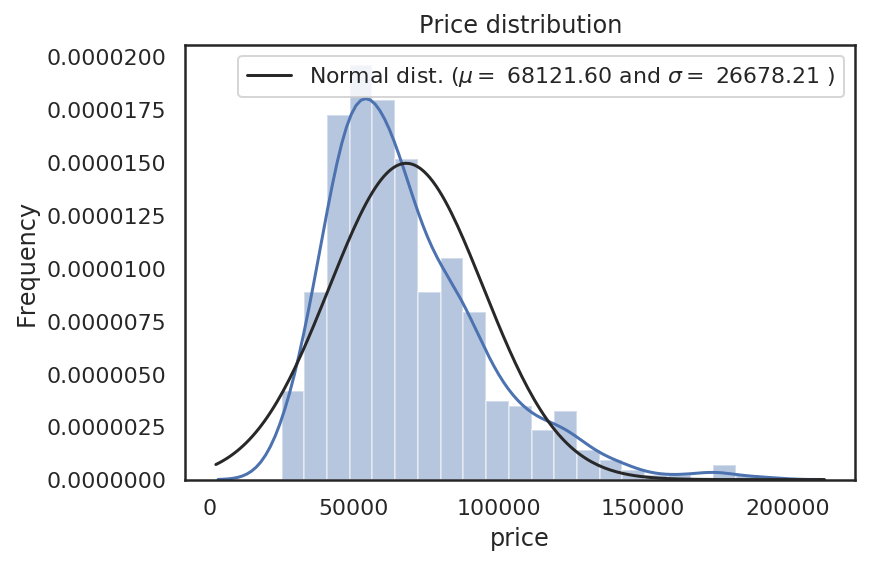

In [10]:
# histogram

sns.distplot(data['price'], fit=norm);
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')


So it does not fit exactly with a Gaussian distribution. So let see with th log of the price

---




 mu = 11.06 and sigma = 0.37



Text(0.5, 1.0, 'Price distribution')

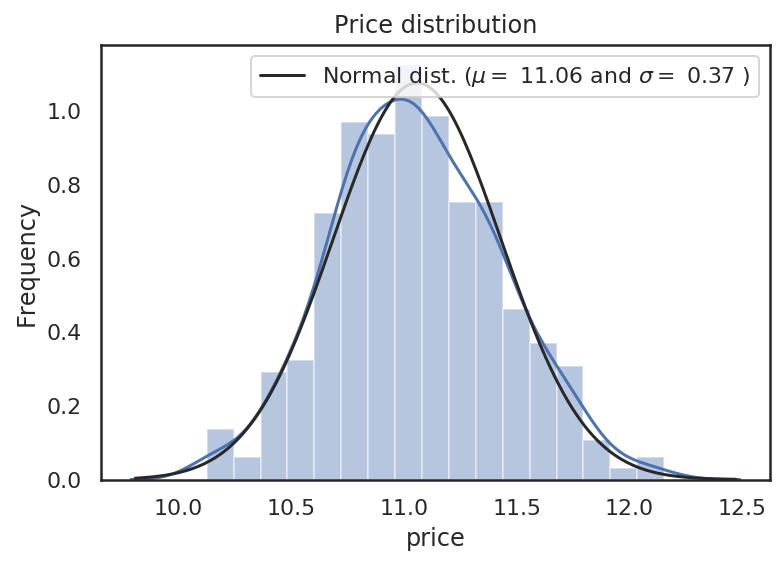

In [11]:
sns.distplot(np.log(data['price']), fit=norm);
(mu, sigma) = norm.fit(np.log(data['price']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')


Now we see that it does stick better

In [0]:
# Quantitative variables distibution

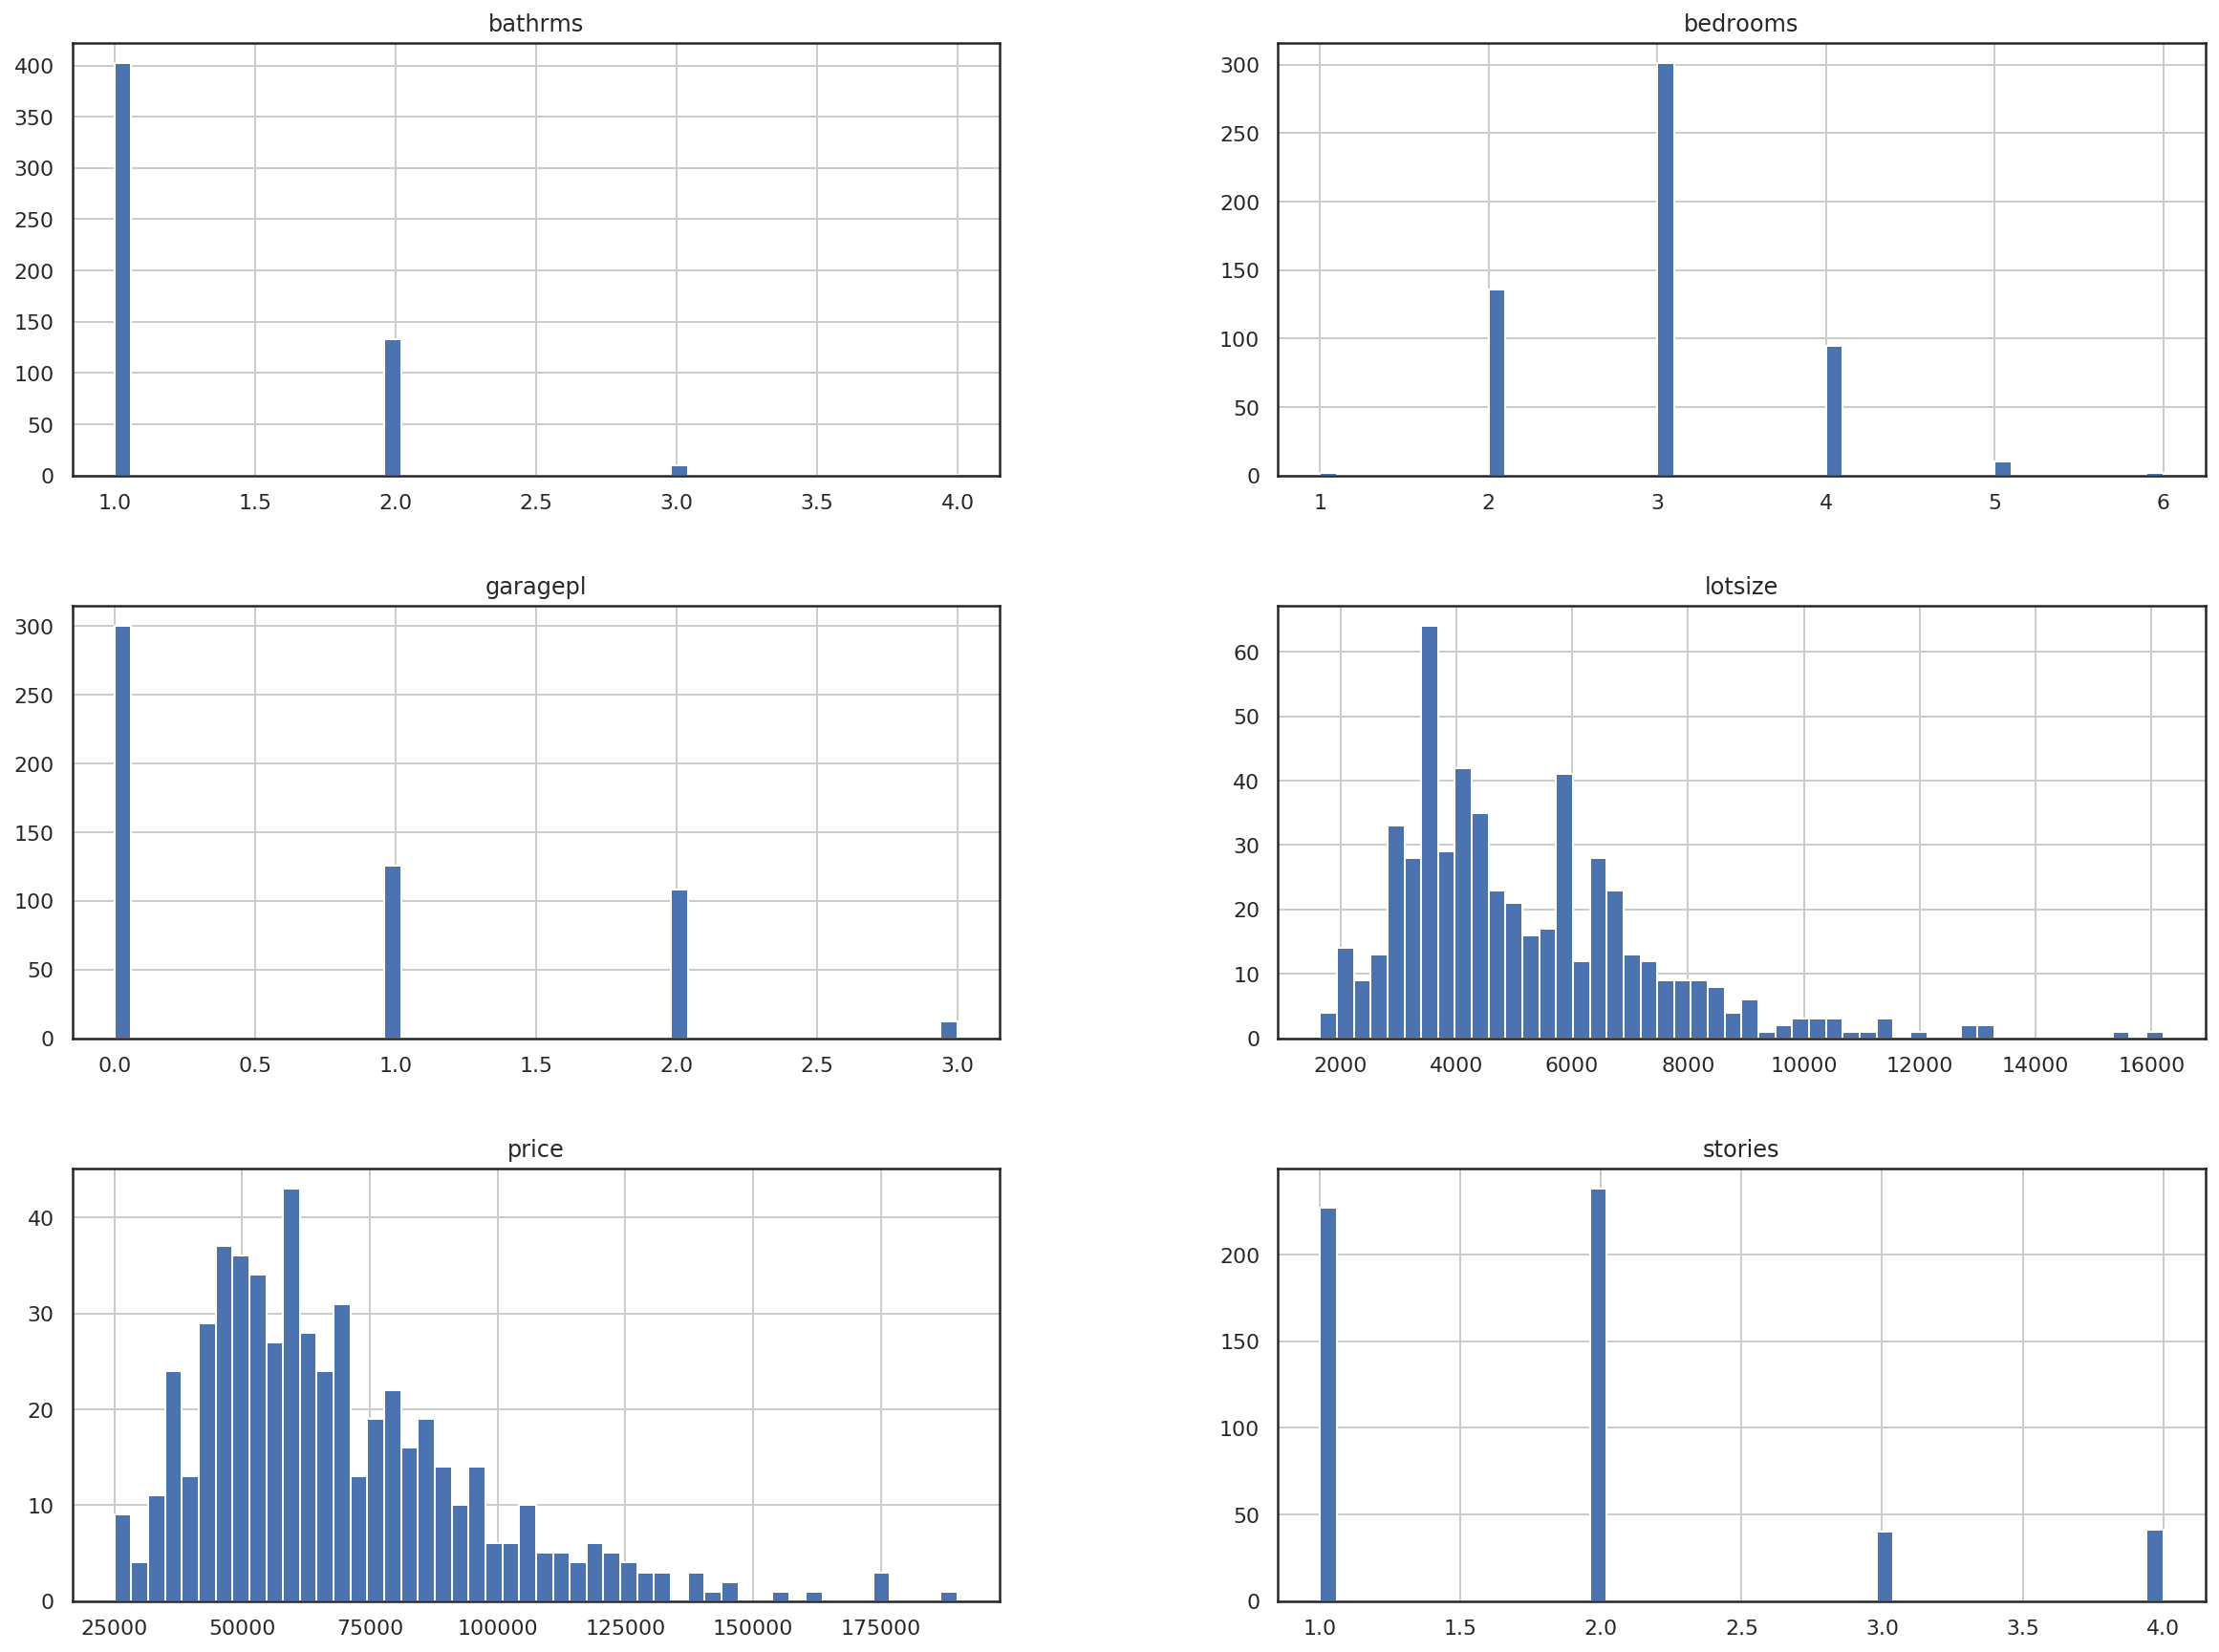

In [12]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

**variables dependencies**

Quantitative variables first

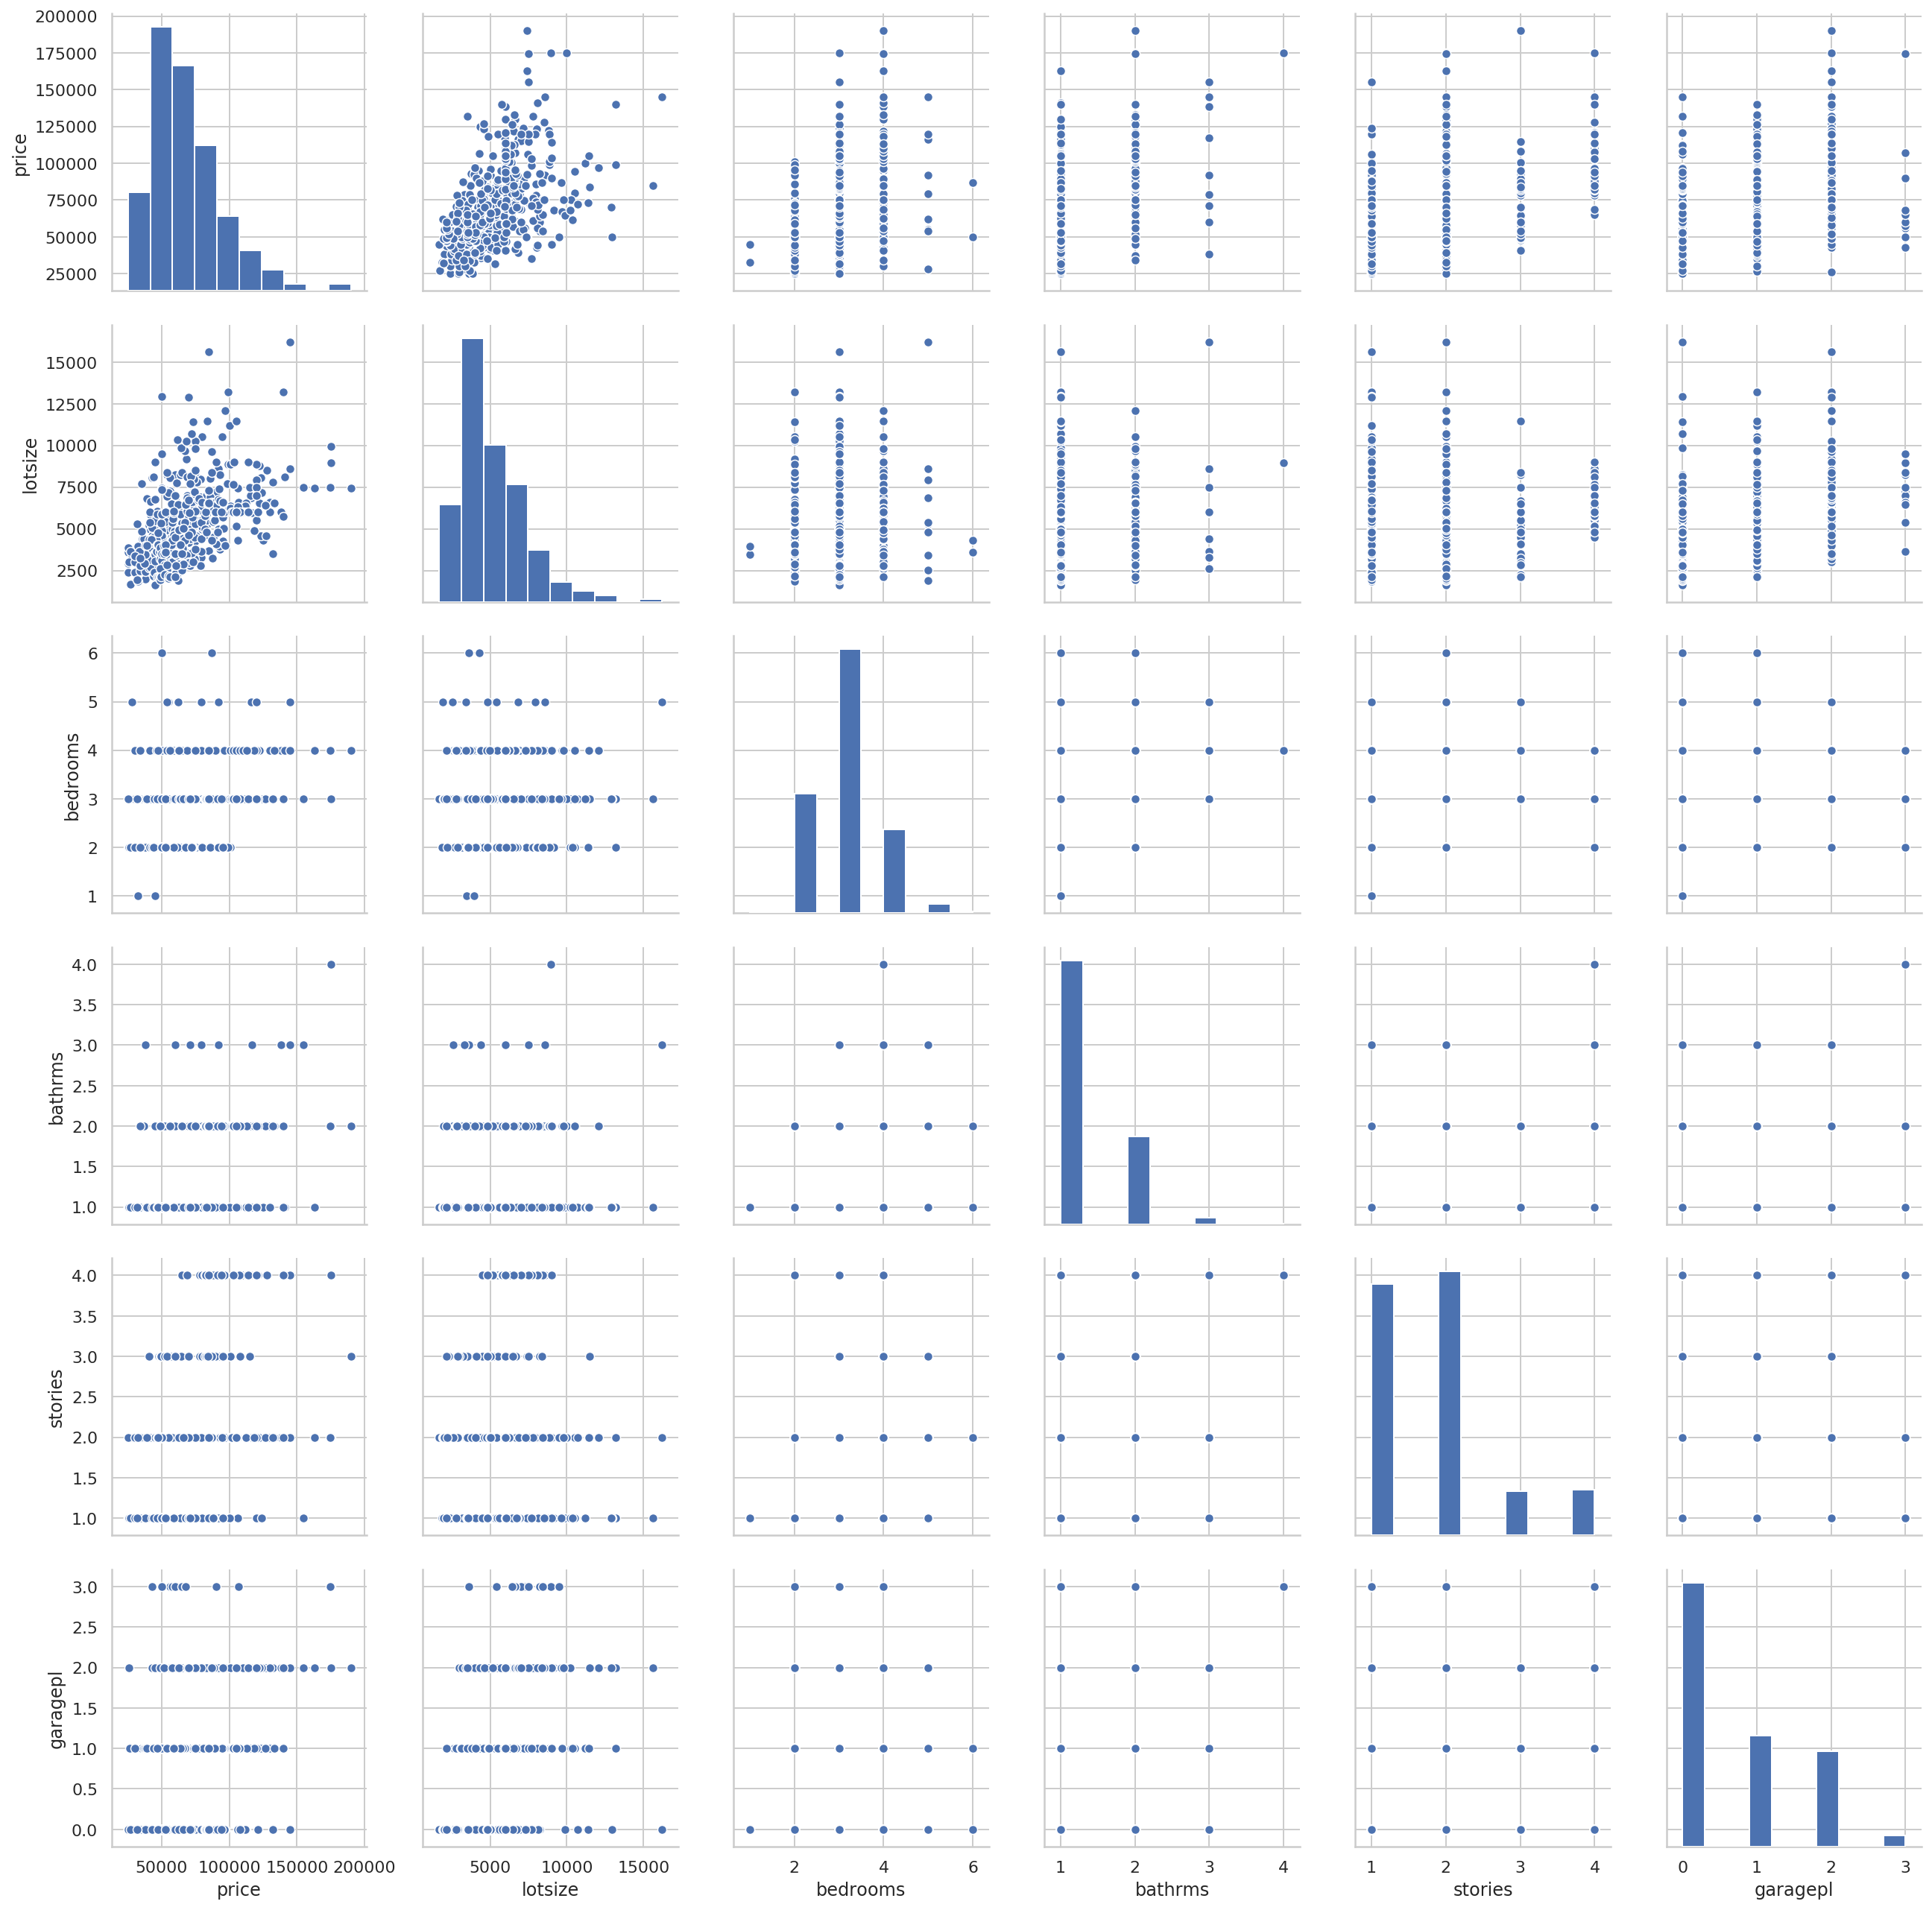

In [0]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(data,height=3)
plt.show()

We notice the strong correlation between price and lotsize. However, we can not conclude for the other variables.

Categorical variables

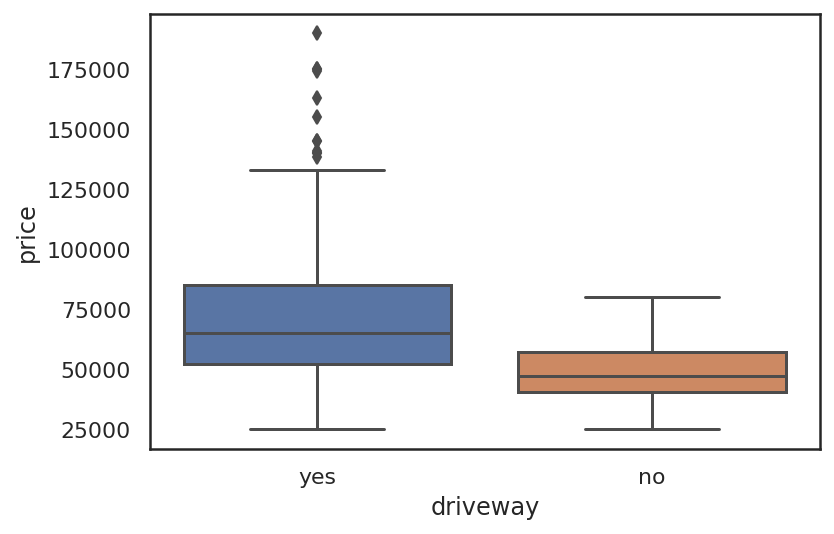

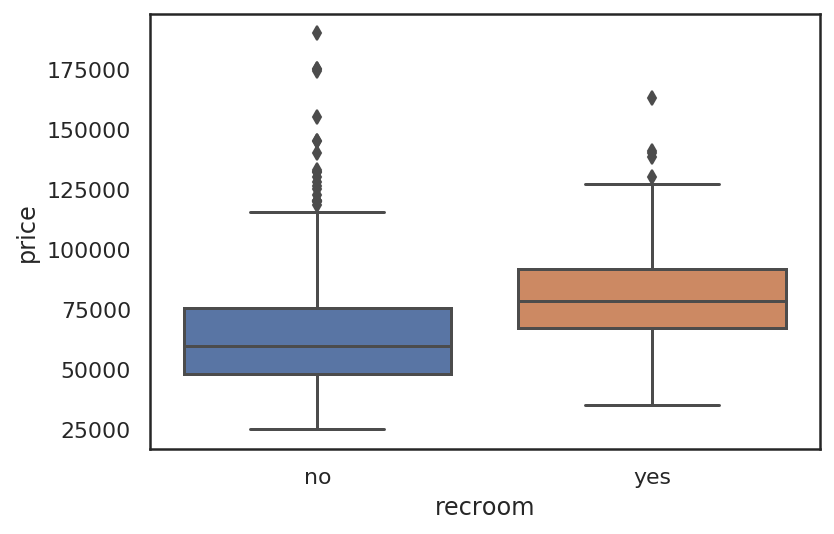

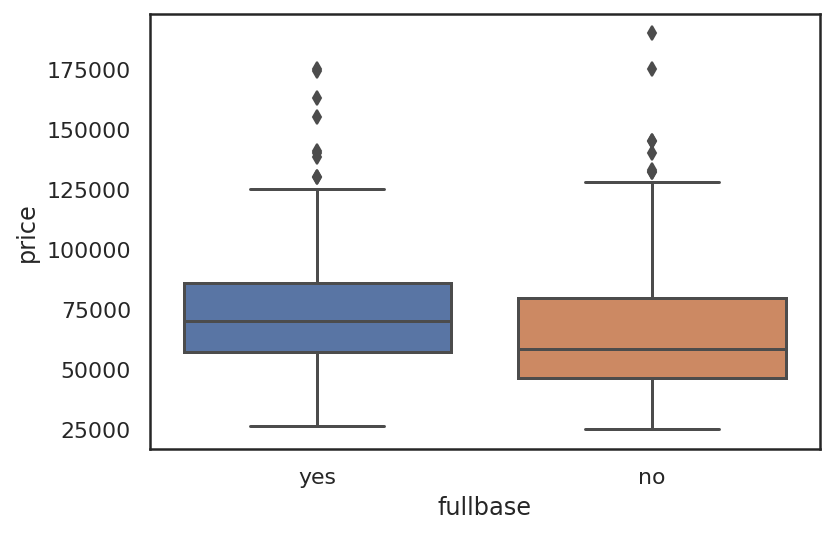

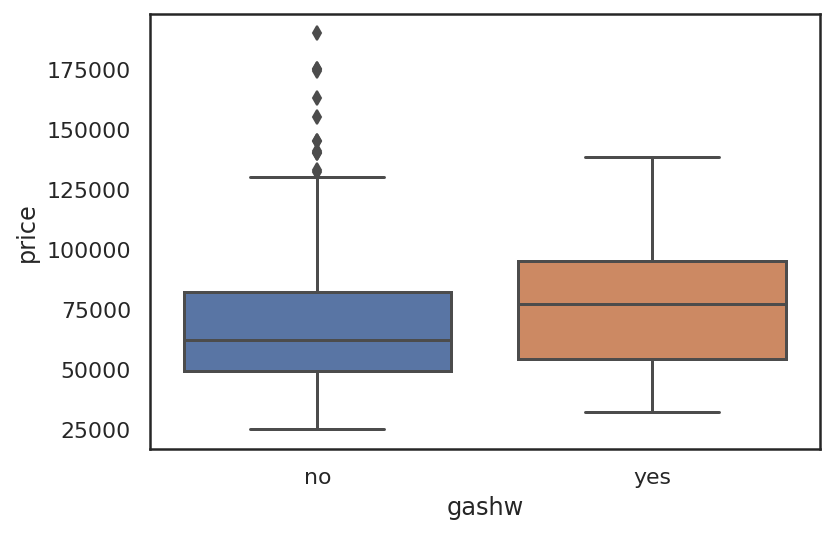

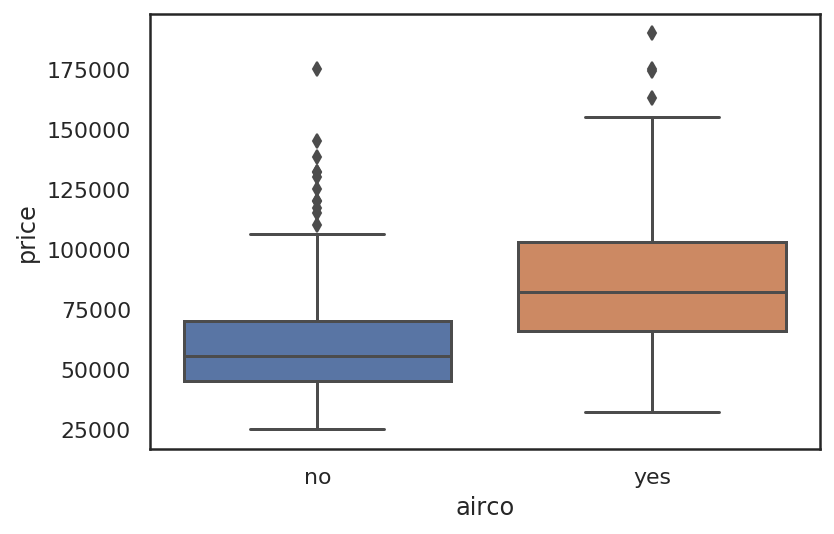

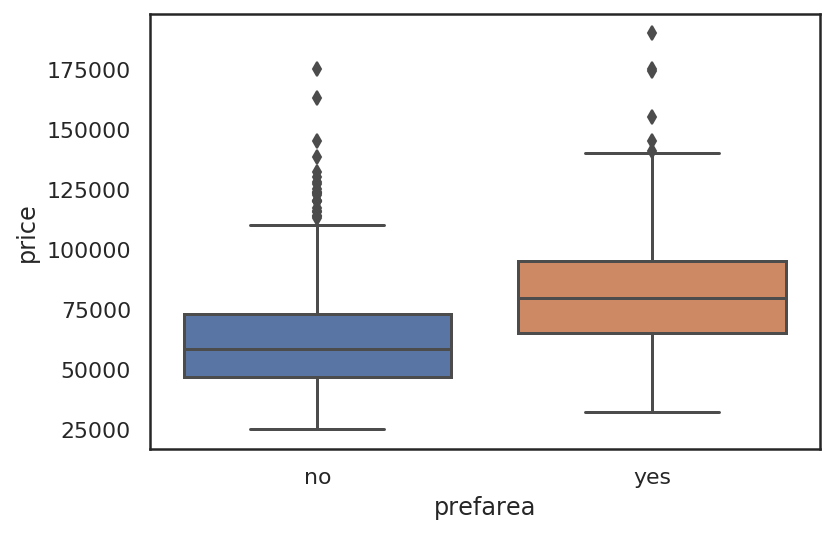

In [13]:
for col in data.select_dtypes(object).columns:
    plt.figure()
    sns.boxplot(col, "price", data = data )

Remarks:

houses with air conditioning are more expensive.

masiosn located in a "preferably" area are more expensive.

houses with a driveway have a higher price.

**Transforming dummy variables**

In [0]:
for col in data.select_dtypes(object).columns:
  encoder = LabelEncoder()
  encoder.fit(list(data[col]))
  data[col] = encoder.transform(list(data[col]))

In [15]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


**Correlations**

In [0]:
def heatMap(df, mirror):

   # On calcule la matrice de corrélation
   corr = df.corr()
   # On affiche la figure 
   fig, ax = plt.subplots(figsize=(10, 10))
   # On genère le grille de couleur 
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      # xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

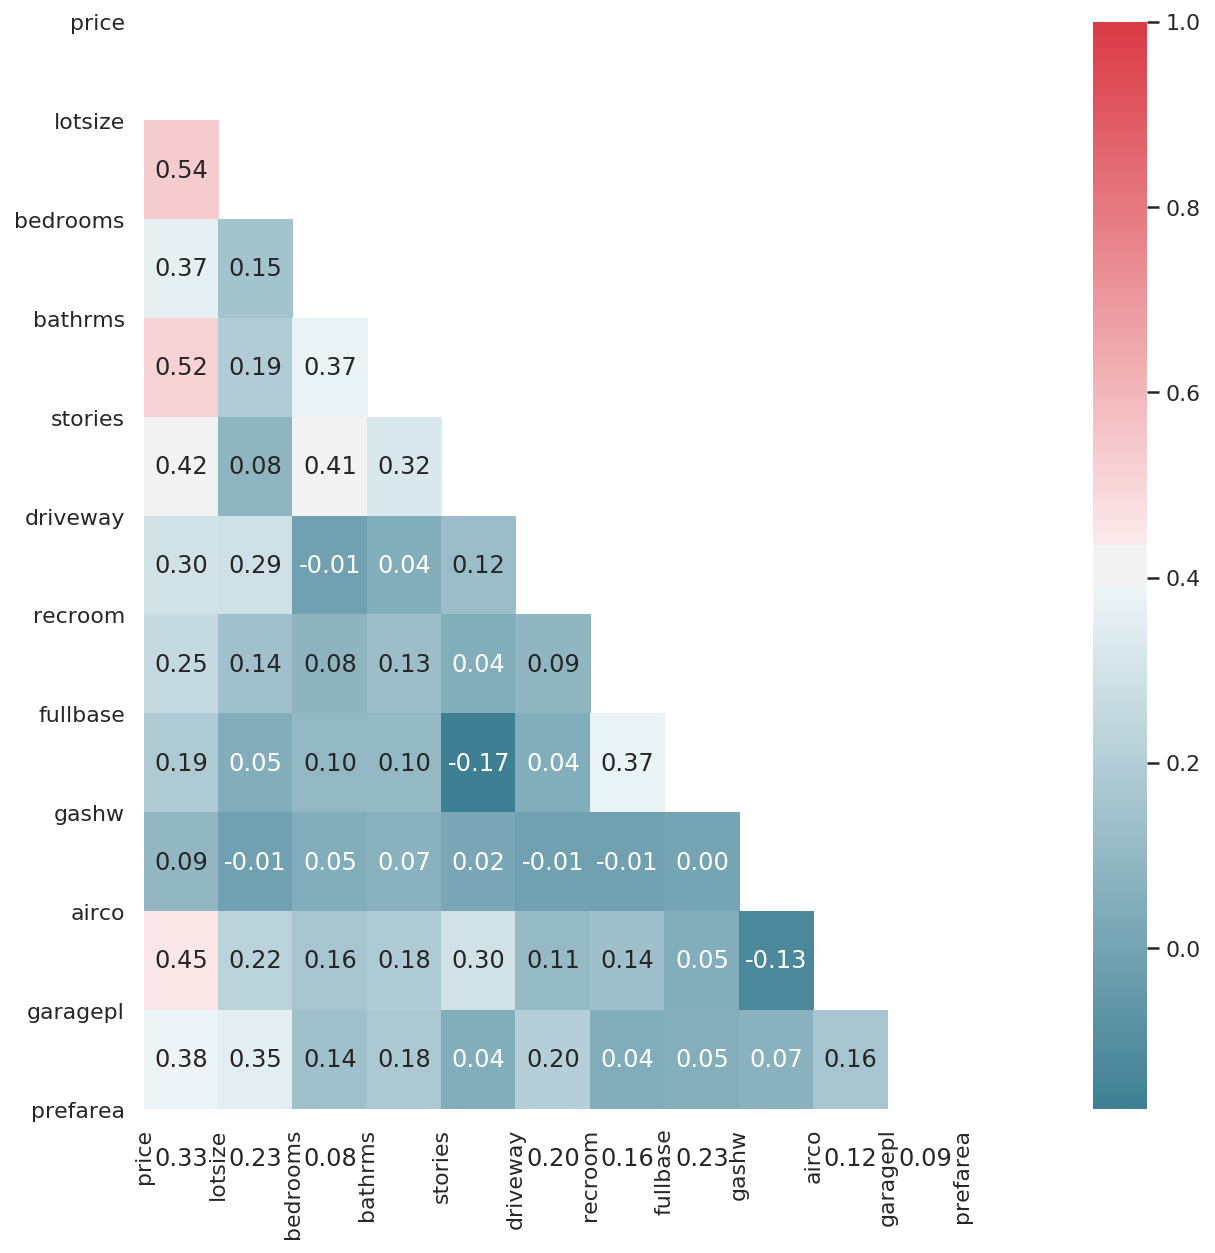

In [17]:
heatMap(data, False )

And it confirm that the price is strongly corrolated with lotsize and airco

**Modelization**

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression , Ridge , Lasso

In [0]:
target = data['price']
del data["price"]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

In [0]:
from sklearn.metrics import r2_score

def rmse(preds,targets):
    return np.sqrt(((preds - targets)**2).mean())


Linear Regression

In [0]:
mod1 = LinearRegression()
mod1.fit(X_train,y_train)
pred1 = mod1.predict(X_test)

In [22]:
results = []
results.append(("Linear Regression",rmse(pred1,y_test),r2_score(y_test,pred1)))
results

[('Linear Regression', 15766.778459599398, 0.7080978843721117)]

Ridge L2 Regularization

In [23]:
params = {'alpha': [i for i in range(100)]}
reg = GridSearchCV(Ridge(), param_grid = params, cv = 4, scoring = 'neg_mean_squared_error')
reg.fit(X_train, y_train)
best_estimator  =  reg.best_estimator_ 
pred11 = best_estimator.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
results.append(("Ridge Regression",rmse(pred11,y_test),r2_score(y_test,pred11)))
results

[('Linear Regression', 15766.778459599398, 0.7080978843721117),
 ('Ridge Regression', 15788.776861701159, 0.7072827705166231)]

Lasso L1 Regulariization

In [25]:
params = {'alpha': [i for i in range(100)]}
reg = GridSearchCV(Lasso(), param_grid = params, cv = 4, scoring = 'neg_mean_squared_error')
reg.fit(X_train, y_train)
best_estimator  =  reg.best_estimator_ 
pred12 = best_estimator.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
results.append(("Lasso Regression",rmse(pred12,y_test),r2_score(y_test,pred12)))
results

[('Linear Regression', 15766.778459599398, 0.7080978843721117),
 ('Ridge Regression', 15788.776861701159, 0.7072827705166231),
 ('Lasso Regression', 15772.47827585632, 0.707886796334724)]

Decision Tree

In [0]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)
pred2 = clf.predict(X_test)

In [28]:
results.append(("Regression Tree",rmse(pred2,y_test),r2_score(y_test,pred2)))
results

[('Linear Regression', 15766.778459599398, 0.7080978843721117),
 ('Ridge Regression', 15788.776861701159, 0.7072827705166231),
 ('Lasso Regression', 15772.47827585632, 0.707886796334724),
 ('Regression Tree', 21163.324887039613, 0.4740806984225273)]

Random Forest

In [0]:
randomForest_model = RandomForestRegressor(n_estimators = 150,random_state = 0)
randomForest_model.fit(X_train,y_train)
pred3 = randomForest_model.predict(X_test)

In [30]:
results.append(("Random Forest",rmse(pred3,y_test),r2_score(y_test,pred3)))
results

[('Linear Regression', 15766.778459599398, 0.7080978843721117),
 ('Ridge Regression', 15788.776861701159, 0.7072827705166231),
 ('Lasso Regression', 15772.47827585632, 0.707886796334724),
 ('Regression Tree', 21163.324887039613, 0.4740806984225273),
 ('Random Forest', 18457.62793551168, 0.5999603058125265)]

Tuned Random Forest

In [0]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num = 3)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
# Tuning hyper-parameters by RandomizedSearchCV
tune_rf = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 200, cv = 4, scoring = 'neg_mean_squared_error', verbose=2, random_state = 167, n_jobs = -1)
tune_rf.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  6.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
best_estimator  =  tune_rf.best_estimator_ 
best_estimator.fit(X_train,y_train)
pred4 = best_estimator.predict(X_test)

In [34]:
results.append(("Tuned RF",rmse(pred4,y_test),r2_score(y_test,pred4)))
results

[('Linear Regression', 15766.778459599398, 0.7080978843721117),
 ('Ridge Regression', 15788.776861701159, 0.7072827705166231),
 ('Lasso Regression', 15772.47827585632, 0.707886796334724),
 ('Regression Tree', 21163.324887039613, 0.4740806984225273),
 ('Random Forest', 18457.62793551168, 0.5999603058125265),
 ('Tuned RF', 17377.596242902942, 0.6454065436832906)]

xgboost

In [35]:
xgboost_model = XGBRegressor(n_estimators=150,random_state= 0)
xgboost_model.fit(X_train,y_train)
pred5 = xgboost_model.predict(X_test)

[12:45:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
results.append(("XGBoost",rmse(pred5,y_test),r2_score(y_test,pred5)))
results

[('Linear Regression', 15766.778459599398, 0.7080978843721117),
 ('Ridge Regression', 15788.776861701159, 0.7072827705166231),
 ('Lasso Regression', 15772.47827585632, 0.707886796334724),
 ('Regression Tree', 21163.324887039613, 0.4740806984225273),
 ('Random Forest', 18457.62793551168, 0.5999603058125265),
 ('Tuned RF', 17377.596242902942, 0.6454065436832906),
 ('XGBoost', 17603.634667627124, 0.636121826676729)]

All results

In [37]:
pd.DataFrame(results,columns=["Model","RMSE","R2"])

,Model,RMSE,R2
0,Linear Regression,15766.778460,0.708098
1,Ridge Regression,15788.776862,0.707283
2,Lasso Regression,15772.478276,0.707887
3,Regression Tree,21163.324887,0.474081
4,Random Forest,18457.627936,0.599960
5,Tuned RF,17377.596243,0.645407
6,XGBoost,17603.634668,0.636122


We find that the linear regression has the best score (both RMSE and R2) on the test set.

**Areas for improvement would be:**

Feature engineering added interaction between explanatory variables

Draw the learning curve to see if adding the data could be beneficial to the models.

